# 2nd/3rd Principal Component Analyses and 3D Scatterplot (liver)

Here we will again explore the DrugMatrix data using dimensionality reduction and cluster analysis. However, because the first two principal components did not yield noticeable clusters on a 2 dimensional space, we will now use the 2nd and 3rd components as well as 3 dimensional plotting of the top 3 components in hopes to see visible variation among the data. 

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data 

Here we import the DrugMatrix (liver) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_liver1'

We will use the liver df to create and explore PCA plots (using only the annotated (23,748) genes in DM's database.

In [10]:
import pandas as pd

#Original liver df
DM_liver = pd.read_table('C:\Users\Troy\Desktop\liver.txt', sep='\t')

#DM_liver2
DM_liver2 = DM_liver.dropna(subset=['Gene'])
DM_liver2.columns.names = ['Drugs']
DM_liver2 = DM_liver2.set_index('Gene')
del DM_liver2['Unnamed: 0']
DM_liver2.head(15) #show top 15 genes

Drugs,MLN-518,ANASTROZOLE,ARTEMISININ,DANAZOL,ITRACONAZOLE,ESTRIOL,LOMUSTINE,KETOCONAZOLE,BETA-ESTRADIOL,FINASTERIDE,...,DEXAMETHASONE.6,CARMUSTINE.7,AMINOSALICYLIC ACID.1,PYROGALLOL.2,NAPROXEN,3-METHYLCHOLANTHRENE.2,MIFEPRISTONE.7,ENOXACIN.4,MLN-518.4,MLN-518.5
Gene,,,,,,,,,,,,,,,,,,,,,
Sumo2,0.008,0.096,0.162,0.006,0.024,-0.019,-0.003,0.012,0.039,0.005,...,0.027,0.107,0.180,-0.025,0.017,0.010,0.107,0.014,0.047,0.016
Cdc37,0.043,0.024,0.052,-0.007,0.017,0.053,-0.041,0.023,0.006,-0.020,...,0.029,0.015,0.158,0.020,-0.011,0.000,0.158,-0.008,0.049,0.010
Copb2,0.039,0.003,-0.014,0.003,0.046,0.060,0.095,0.105,0.002,0.078,...,0.099,0.029,0.041,0.061,0.156,0.036,0.260,0.096,0.036,-0.028
Vcp,0.014,0.129,-0.022,0.049,-0.077,0.044,-0.072,0.054,-0.022,-0.037,...,0.109,-0.046,0.025,0.008,-0.037,0.021,0.288,0.064,0.009,0.007
Ube2d2,0.058,0.035,-0.016,-0.039,0.014,-0.039,-0.039,0.061,-0.021,-0.055,...,0.095,0.003,0.114,-0.045,0.059,-0.024,0.217,0.041,0.055,-0.014
Becn1,0.081,0.138,0.122,-0.036,0.049,0.052,-0.041,0.014,-0.035,-0.105,...,0.024,0.073,0.150,0.023,0.001,0.035,0.130,-0.030,0.092,0.057
Lypla2,0.043,0.011,-0.053,-0.014,-0.027,0.026,-0.108,0.010,0.002,-0.156,...,0.045,-0.030,0.036,0.091,-0.090,-0.013,-0.019,0.049,0.033,0.064
Arf1,0.020,0.048,0.032,0.060,0.009,0.058,-0.019,0.127,-0.012,-0.022,...,0.191,0.005,0.037,0.007,0.077,0.015,0.138,0.051,0.025,-0.022
Gdi2,0.018,0.063,0.057,0.045,-0.028,0.057,-0.016,0.048,-0.046,-0.023,...,0.093,-0.021,0.087,-0.012,-0.005,-0.027,0.065,-0.018,0.047,-0.002


In [4]:
print len(DM_liver2.index) -2, "Genes" 
print len(DM_liver2.columns) -1, "Drugs"

23748 Genes
659 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Dimensionality Reduction

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 41 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_liver2_2d'

We also can check the explained variance ratio as shown below.

In [5]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=3)
pca2.fit(DM_liver2)

DM_2d2 = pca2.transform(DM_liver2)

DM_liver2_2d = pd.DataFrame(DM_2d2)
DM_liver2_2d.index = DM_liver2.index
DM_liver2_2d.columns = ['PC1','PC2','PC3']
DM_liver2_2d.head(10)
#DM_liver2_2d.to_csv('C:\Users\Troy\Desktop\DM_livertsne.txt')

,PC1,PC2,PC3
Gene,,,
Sumo2,-0.151108,-0.518449,0.547943
Cdc37,-0.330462,-0.563965,0.853581
Copb2,-1.006482,-0.501724,0.529714
Vcp,-0.468922,-0.551194,0.839670
Ube2d2,-0.213907,-0.527649,0.570782
Becn1,-0.394089,-1.009958,0.688748
Lypla2,0.455232,-0.385932,0.519835
Arf1,-0.743912,-0.631464,0.374262
Gdi2,-0.232147,-0.715870,0.684827


In [6]:
print(pca2.explained_variance_ratio_)

[ 0.11278901  0.04779413  0.03487051]


## Plotting the data (PC1&2)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

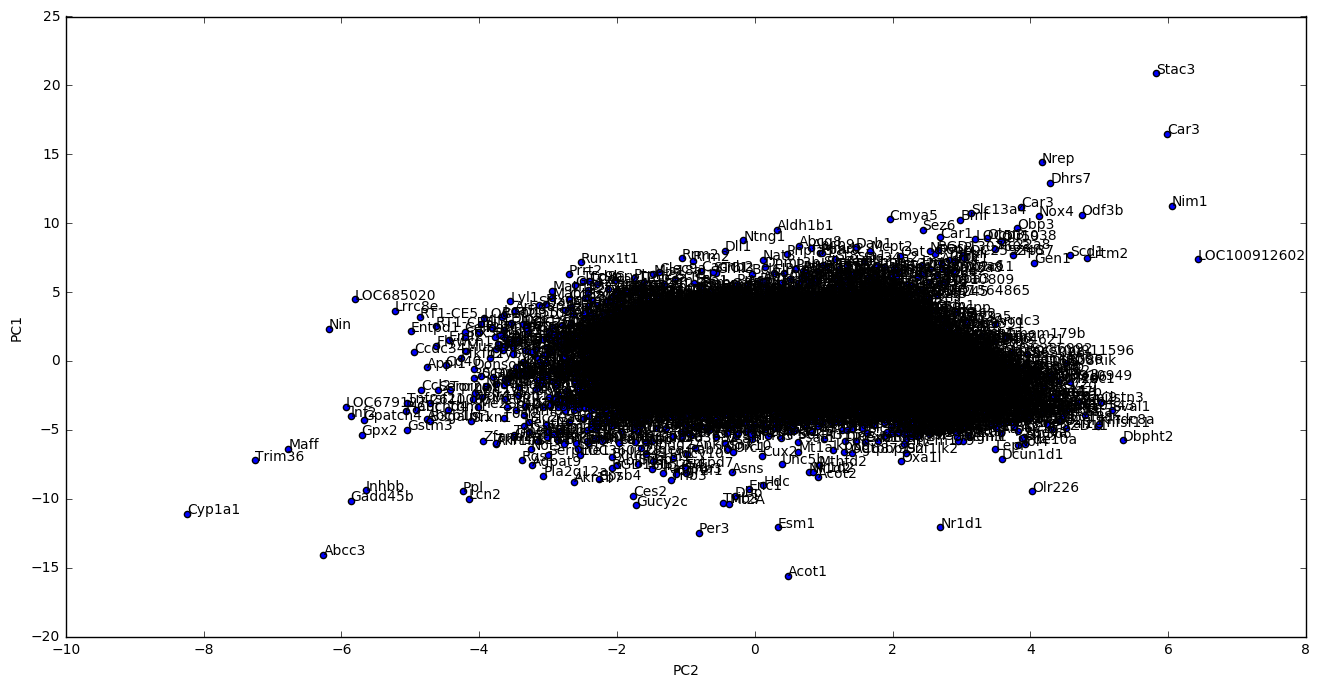

In [7]:
%matplotlib inline

ax = DM_liver2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_liver2.index):
    ax.annotate(Drug, (DM_liver2_2d.iloc[i].PC2, DM_liver2_2d.iloc[i].PC1))

## Plotting the data (PC2&3)

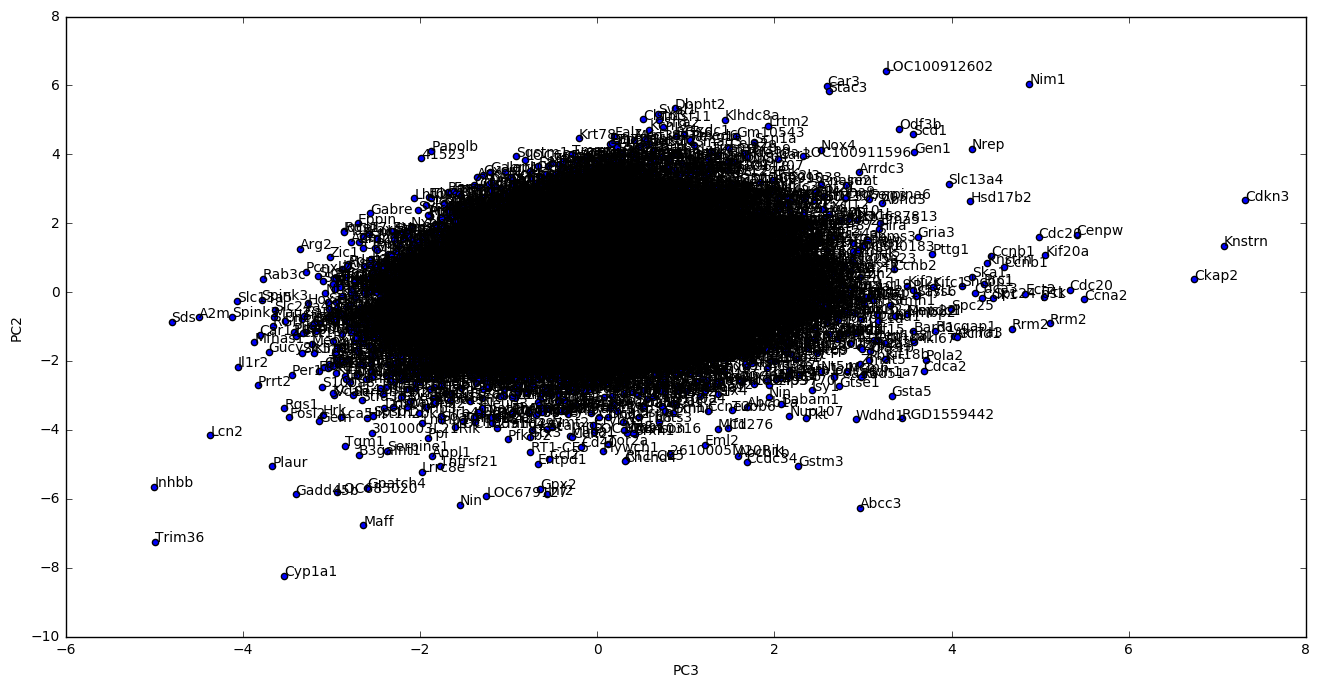

In [8]:
%matplotlib inline

ax = DM_liver2_2d.plot(kind='scatter', x='PC3', y='PC2', figsize=(16,8))

for i, Drug in enumerate(DM_liver2.index):
    ax.annotate(Drug, (DM_liver2_2d.iloc[i].PC3, DM_liver2_2d.iloc[i].PC2))

## Interactive 3D plot (Top 3 PCs)

In [9]:
import plotly.plotly as py
py.sign_in('troypgoff', '2AWnQIHTKdriCuI6TdCp')
fig = py.get_figure("https://plot.ly/~TroyPgoff/36/")
py.iplot(fig)